#**Vaccine Prioritizations using SEIR model - Introduction**
The SEIR model is a variation of the basic SIR model that incorporates an extra "exposed" state for individuals. The SEIR model is used for diseases that have an incubation period which the exposed state represents, which is valid for COVID-19. We'll be using the extended SEIR model, which extends the classic model to represent asymptomatic and symptomatic states, which have particular relevance to the COVID-19 pandemic.<br><br>
The goal of our study is to implement the susceptible-exposed-infectious-recovered (SEIR) dynamics on a stochastic dynamical network that is age-stratified, and provide users with data-driven results for vaccine prioritizations within our population. The SEIR model is a dynamical system that is represented by a series of differential equations, describing the evolution of the system in terms of how many people are at each state. <br><br> After we set up our models and understand the inputs, we'll first show a simple deterministic variation of the SEIR model, so we can see how the model behaves with a given set of fixed arguments. In addition, we'll add external factors such as social distancing at fixed timestamps to see how we can utilize the different extensions that the SEIRS+ Model Framework offers for representing the real-world. Finally, we'll create our stochastic dynamical network where each node is age-stratified and represents an individual. We can then apply the SEIR model on this network along with varying vaccine distributions to simulate how it may impact our population of interest.

#**Model Setup / Definitions**
We'll import the SEIRS+ Model Framework which implements models of generalized SEIRS infectious disease dynamics, with extensions that will allow us to study the effect of vaccination prioritizations on different age groups.

In [ ]:
!pip install seirsplus
from seirsplus.models import *

     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for seirsplus: filename=seirsplus-1.0.9-cp37-none-any.whl size=64635 sha256=2e86e47915a70b37cf7611717ee70ab53ee0fbddc64325ac929cc7db01af0469
  Stored in directory: /root/.cache/pip/wheels/f0/83/18/7b9b20364e2740f54c21cf5b3ebfde5a8a93071e098782c705
Successfully built seirsplus


All model parameter values are set in the call to the SEIRSModel constructor. 
The following parameters are defined with their data type and default value: <br>

* **beta:** rate of transmission, *float*, REQUIRED <br>
* **sigma:**	rate of progression, *float*, REQUIRED <br>
* **gamma:**	rate of recovery, *float*, REQUIRED <br>
* **xi:**	rate of re-susceptibility, *float*, 0 <br>
* **mu_I:**	rate of infection-related mortality, *float*, 0 <br>
* **mu_0:**	rate of baseline mortality, *float*, 0 <br>
* **nu:**	rate of baseline birth, *float*, 0 <br>
* **beta_Q:**	rate of transmission for detected cases, *float*, None (set equal to beta) <br>
* **sigma_Q:**	rate of progression for detected cases, *float*, None (set equal to sigma) <br>
* **gamma_Q:**	rate of recovery for detected cases, *float*, None (set equal to gamma) <br>
* **mu_Q:**	rate of infection-related mortality for detected cases, *float*,   None (set equal to mu\_I) <br>
* **theta_E:**	rate of testing for exposed individuals, *float*, 0 <br>
* **theta_I:**	rate of testing for infectious individuals, *float*, 0 <br>
* **psi_E:**	probability of positive tests for exposed individuals, *float*, 0 <br>
* **psi_I:**	probability of positive tests for infectious individuals, *float*, 0 <br>
* **initN:**	initial total number of individuals, *int*, 10 <br>
* **initI:**	initial number of infectious individuals, *int*, 10 <br>
* **initE:**	initial number of exposed individuals, *int*, 0 <br>
* **initQ_E:**	initial number of detected exposed individuals, *int*, 0 <br>
* **initQ_I:**	initial number of detected infectious individuals, *int*, 0 <br>
* **initR:**	initial number of recovered individuals, *int*, 0 <br>
* **initF:**	initial number of deceased individuals, *int*, 0 <br>

The basic SEIR parameters are initN, beta, sigma, and gamma. 
An example state of the system where we have a Disease-Free-Equilibrium is (N,0,0,0), where N is our population. For our simulations, we will be using statistics from the United States.


#**Creating a basic deterministic SEIR model**
Here, we will be building a simple deterministic model which demonstrates how we can manipulate simulation parameters to model potential scenarios. The system of differential equations that the model is built upon is simply solved numerically, excluding any external chance events of the system. This simple model will show the spread of COVID-19 before any vaccinations, and will be the foundation of our future simulations. In this example, we'll also see how we can introduce factors such as social distancing and how they impact our system.

##**Initializing model parameters**
Using the parameters defined in the previous section, we can create a SEIRSModel with our desired values. The only required parameters are initN, beta, sigma, and gamma. For this example, all parameters are listed, so feel free to manipulate the variables and see how they change the output! <br><br>
Using our pre-determined values for the United States, we get 0.147, 0.192, 0.077 for beta, sigma, and gamma, respectively. We also have 0.0015 for mu_I, the infection-related mortality. This model is completely dependent upon these values, and no other factors are included. To better see our results, we use a population initN of 1,000,000 which provides us with more granularity, but still represents our target population.

In [ ]:
model = SEIRSModel(initN   =1000000,
                   beta    =0.147, 
                   sigma   =0.192, 
                   gamma   =.077, 
                   mu_I    =0.0015,
                   mu_0    =0, 
                   nu      =0, 
                   xi      =0,
                   beta_Q  =0.147, 
                   sigma_Q =.192, 
                   gamma_Q =.077, 
                   mu_Q    =0.0015,
                   theta_E =0, 
                   theta_I =0, 
                   psi_E   =1.0, 
                   psi_I   =1.0,
                   initI   =10000, 
                   initE   =0, 
                   initQ_E =0, 
                   initQ_I =0, 
                   initR   =0, 
                   initF   =0)

##**Running our simulation**
Once we've initialized our SEIR model, we can run a simulation with a call to run(), which has the following arguments:<br>
* **T:**	runtime of simulation, *numeric*, REQUIRED <br>
* **checkpoints:**	dictionary of checkpoint lists (see section below), 	*dictionary*, None <br>
* **print_interval:**	(network model only) time interval to print sim status to console, *numeric*, 10 <br>
* **verbose:**	if True, print count in each state at print intervals, else just the time, *bool*, False <br>

In [ ]:
model.run(T=300)

t = 299.90


True

##**Visualizing the results**
Now that we have everything setup, all we need to do is create a plot for our results. The SEIRSNetworkModel class provides functions that generate models of our simulation. Here, we demonstrate the two functions:
 * **figure_basic()** generates a line plot of the frequency of each state in our population
 * **figure_infections()** generates a stacked area plot of the frequency of only the infection states (E, I, Q) in our population.

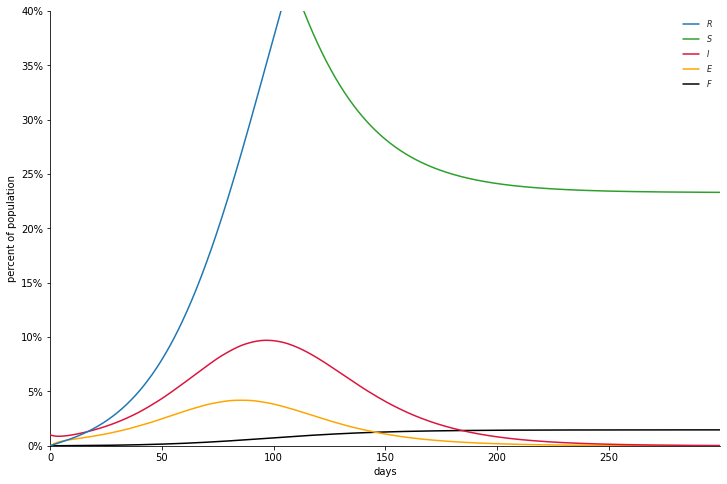

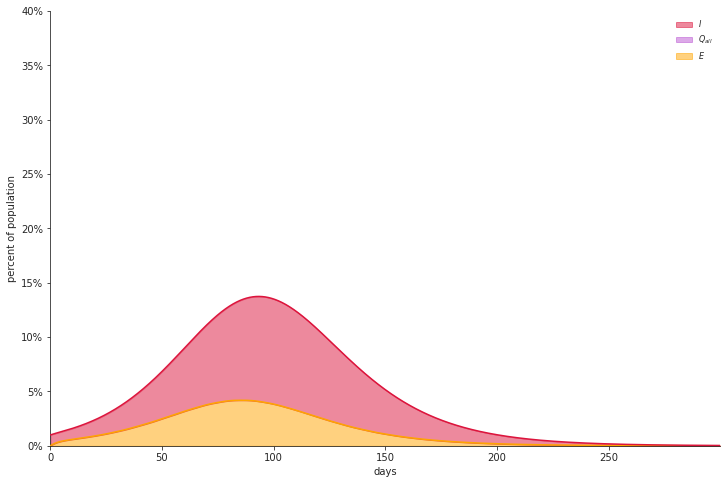

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f307ff44d10>)

In [ ]:
model.figure_basic(ylim=0.4)
model.figure_infections(ylim=0.4)

##**Implementing additional factors**
Now that we have a basic understanding of how the SEIR model is used, we can add additional factors such as social distancing and view its effects. To see how additional factors can impact our model, we reduce the rate of transmission at t = 50, which can correspond to factors like social distancing (or vaccines) which reduce the spread of the virus.

[Checkpoint: Updating parameters]
t = 49.90


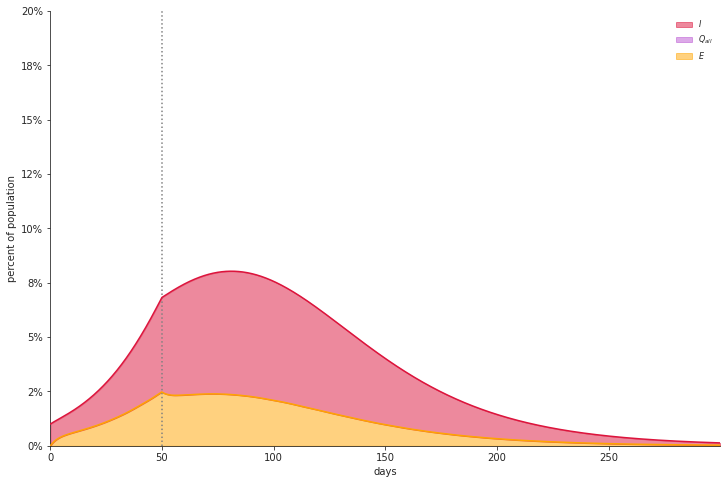

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f307fe6a550>)

In [ ]:
model = SEIRSModel(initN   =1000000,
                   beta    =0.147, 
                   sigma   =0.192, 
                   gamma   =.077, 
                   mu_I    =0.0015,
                   mu_0    =0, 
                   nu      =0, 
                   xi      =0,
                   beta_Q  =0.147, 
                   sigma_Q =.192, 
                   gamma_Q =.077, 
                   mu_Q    =0.0015,
                   theta_E =0, 
                   theta_I =0, 
                   psi_E   =1.0, 
                   psi_I   =1.0,
                   initI   =10000, 
                   initE   =0, 
                   initQ_E =0, 
                   initQ_I =0, 
                   initR   =0, 
                   initF   =0)

checkpoints = {'t':       [50], 
               'beta':    [0.11]
              }

model.run(T=300, checkpoints=checkpoints)

model.figure_infections(vlines=checkpoints['t'], ylim=0.2)

From our resulting model, we can see that at t = 50, the increase of the number of infected dramatically stops increasing, and quickly reaches its peak. Compared to our first model, we can see that the maximum number of infected individuals in our population is much lower.

#**The Stochastical Model**
We will now be creating the stochastical models for our study. In contrast to the deterministic model, our stochastical models will possess some inherent randomness. <br><br>
 When studying disease transmission, it's important to consider patterns of interactions which can be seen in real-world contact networks (e.g., heterogeneity, transitivity, network structure). The creation of a network model will allow us to analyze transmission patterns and network-based interventions with respect to properties of a realistic contact network. Strategies for mitigating spread can be thought of as perturbing the contact network (e.g., vaccinations, social distancing, testing). <br><br> 
In this section, we'll first be creating the network for our population where each node will be age-stratified and will represent an individual. Then, for each age group, we'll apply vaccinations and run our simulation. As a result, we'll see how varying prioritizations of age groups may impact the overall population.

##**Creating our network**
There are multiple networks that we can use to represent our population, depending on what we want to show. For our study, we'll be using FARZ networks, which has built-in community structure which will allow us to represent the various age groups as communities within our population. For these communities, the FARZ algoritm offers parameters which will allow for randomness and transitivity among nodes, which will represent the virus and its spread among the different communities.<br><br>

The following imports will give us the tools needed to create our network and run our simulation.

In [ ]:
from seirsplus.models import *
from seirsplus.networks import *
from seirsplus.sim_loops import *
from seirsplus.utilities import *

In our network, our nodes (which represent people) are divided up into households, where the distribution of household size and age demographics are provided for the generation of our graph. The resulting values are randomized and change each time it's run to provide stochasticity for each simulation, but still remain close to our given distributions. The nodes in each household will be strongly connected.<br><br>

To represent out-of-household contact between nodes, we create layers in our FARZ network. Each layer is age-stratisfied, and is used to represent contact among individuals of the same age group. 
We'll be using our pre-determined age groups of under 20 (communities can be thought of as school/college), 20 - 39 (communities can be thought of as workplaces), 40 - 59, 60-79, and 80+. Each of the nodes in our households will belong to a layer.<br><br>

In addition to our network layer interactions, there will also be a probability of well-mixed global interactions, where random nodes interact with another node anywhere in the network (i.e. people that interact with others outside their age group). This is a default feature in the SEIRS+ network models.

##**Setting basic parameters**
Here we set the population size and the initial population that is exposed. We use a graph size of 1000 to reduce simulation time, but networks with ~10,000 nodes better represent per-capita population dynamics. From our data, we set the intial prevalance to be 6% of the population.


In [ ]:
N = 1000
INIT_EXPOSED = int(N*0.06)

## **Generating the network**
Now we create the household and age-stratified layers of our network, and pass it into the network generation function to create our network.<br><br>
Remember - this model is *stochastic*, so the number of nodes in each age group should slightly change from one execution to the next. The number of nodes in each age group is printed.

In [ ]:
# we create the data for our households, using our initial US data for age distribution, 
# and data from the US census for household size
household_data = {
                   'age_distn':{'0-9': 0.12435, 
                                '10-19': 0.12435, 
                                '20-29': 0.136, 
                                '30-39': 0.136, 
                                '40-49': 0.12595, 
                                '50-59': 0.12595, 
                                '60-69': 0.094, 
                                '70-79': 0.094, 
                                '80+'  : 0.0394  
                                },
                   'household_size_distn':{ 1: 0.284, 
                                           2: 0.345, 
                                           3: 0.151, 
                                           4: 0.128, 
                                           5: 0.058, 
                                           6: 0.023, 
                                           7: 0.011 
                                           },
                   'household_stats':{ 'pct_with_under20': 0.337,                      # percent of households with at least one member under 60
                                       'pct_with_over60': 0.380,                       # percent of households with at least one member over 60
                                       'pct_with_under20_over60':  0.034,              # percent of households with at least one member under 20 and at least one member over 60
                                       'pct_with_over60_givenSingleOccupant': 0.110,   # percent of households with a single-occupant that is over 60
                                       'mean_num_under20_givenAtLeastOneUnder20': 1.91 # number of people under 20 in households with at least one member under 20
                                     }
                 }

# we create our layers, which are age-stratified and used to model 
# out-of-household interactions between communities
layer_info  = {
                'Under 20': {'ageBrackets': ['0-9', '10-19'], 'meanDegree': 13.2, 'meanDegree_CI': (0, 19.8) },
                '20-39': {'ageBrackets': ['20-29', '30-39'], 'meanDegree': 16.2, 'meanDegree_CI': (12.5, 19.8) },
                '40-59': {'ageBrackets': ['40-49', '50-59'], 'meanDegree': 14.2, 'meanDegree_CI': (12.5, 19.8) },
                '60+': {'ageBrackets': ['60-69', '70-79', '80+'], 'meanDegree': 13.9, 'meanDegree_CI': (7.3, 20.5) }
              }

# finally we create our graph with our pre-defined dicts; household_data 
# and layer_info
demographic_graph, ageGroups, households = generate_demographic_contact_network(N, household_data, 'FARZ', layer_info, distancing_scales=[0.7], isolation_groups=[])

G_baseline = demographic_graph['baseline']
G_quarantine = demographic_graph['distancingScale0.7']
households_indices = [household['indices'] for household in households]

# print out the number of nodes in each age group to better see our distribution
nodesU20 = []
nodesU39O20 = []
nodesU59O40 = []
nodesU79O60 = []
nodesO80 = []
nodeNum = 0
for ageGroup in ageGroups:
  if ageGroup == '0-9' or ageGroup == '10-19':
    nodesU20.append(nodeNum)
  elif ageGroup == '20-29' or ageGroup == '30-39':
    nodesU39O20.append(nodeNum)
  elif ageGroup == '40-49' or ageGroup == '50-59':
    nodesU59O40.append(nodeNum)
  elif ageGroup == '60-69' or ageGroup == '70-79':
    nodesU79O60.append(nodeNum)
  elif ageGroup == '80+':
    nodesO80.append(nodeNum)
  nodeNum += 1

print("\nNum nodes Under 20:", len(nodesU20))
print("Num nodes 20-39:", len(nodesU39O20))
print("Num nodes 40-59:", len(nodesU59O40))
print("Num nodes 60-79:", len(nodesU79O60))
print("Num nodes 80+:", len(nodesO80), "\n")

Generated overall age distribution:
0-9: 0.1250	(0.0006 from target)
10-19: 0.1300	(0.0057 from target)
20-29: 0.1190	(-0.0170 from target)
30-39: 0.1470	(0.0110 from target)
40-49: 0.1250	(-0.0010 from target)
50-59: 0.1200	(-0.0060 from target)
60-69: 0.0850	(-0.0090 from target)
70-79: 0.1030	(0.0090 from target)
80+: 0.0460	(0.0066 from target)

Generated household size distribution:
1: 0.2680	(-0.0160 from target)
2: 0.3226	(-0.0224 from target)
3: 0.1737	(0.0227 from target)
4: 0.1538	(0.0258 from target)
5: 0.0645	(0.0065 from target)
6: 0.0124	(-0.0106 from target)
7: 0.0050	(-0.0060 from target)
Num households: 403
mean household size: 2.444

Generating graph for Under 20...
Generating graph for 20-39...
Generating graph for 40-59...
Generating graph for 60+...

Num nodes Under 20: 255
Num nodes 20-39: 266
Num nodes 40-59: 245
Num nodes 60-79: 188
Num nodes 80+: 46 



##**Setting model parameters**
Parameter values for our model are assigned to members of the population on an individual basis. Each node will have a differing rate of transmission, progression, recovery, etc. We create a distribution of values for each of our parameters that will have a mean of our initial data.

In [ ]:
# network_info(G_baseline, "Baseline", plot=True)
latentPeriod_mean, latentPeriod_coeffvar = 3.0, 0.6
SIGMA   = 1 / gamma_dist(latentPeriod_mean, latentPeriod_coeffvar, N)

presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar = 2.2, 0.5
LAMDA   = 1 / gamma_dist(presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar, N)

symptomaticPeriod_mean, symptomaticPeriod_coeffvar = 3.0, 0.4
GAMMA   = 1 / gamma_dist(symptomaticPeriod_mean, symptomaticPeriod_coeffvar, N)

infectiousPeriod = 1/LAMDA + 1/GAMMA

onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar = 11.0, 0.45
ETA     = 1 / gamma_dist(onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar, N)

hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar = 11.0, 0.45
GAMMA_H = 1 / gamma_dist(hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar, N)

hospitalizationToDeathPeriod_mean, hospitalizationToDeathPeriod_coeffvar = 7.0, 0.45
MU_H    = 1 / gamma_dist(hospitalizationToDeathPeriod_mean, hospitalizationToDeathPeriod_coeffvar, N)

PCT_ASYMPTOMATIC = 0.25
PCT_ASYMPTOMATIC = [0.8 if age in ['0-9', '10-19'] else PCT_ASYMPTOMATIC for age in ageGroups]

R0_mean     = 2.5
R0_coeffvar = 0.2
R0 = gamma_dist(R0_mean, R0_coeffvar, N)
BETA = 1/infectiousPeriod * R0
BETA_Q = BETA * (0.3/R0_mean)
BETA_PAIRWISE_MODE  = 'infected'
DELTA_PAIRWISE_MODE = 'mean'
ALPHA = [0.5 if age in ['0-9', '10-19'] else 1.0 for age in ageGroups]
P_GLOBALINTXN = 0.2
Q_GLOBALINTXN = 0.05

##**Administering Vaccines**
While the SEIRS+ Model framework doesn't provide a specific option for vaccinations, we're able to emulate the effect through the manipulation of relevant variables. When an individual in the population is vaccinated, they are still able to interact with others and spread the virus.<br><br>
In the following simulation runs, we'll be manipulating the hospilization and resulting fatality rates for each age group to achieve this characteristic. By changing these variables for each of our age groups, any node in our network is still able to interact with other nodes and transmit/contract the virus, except they are highly unlikely to be hospilized and die as a result. When an age group in our network is vaccinated, we'll be setting the hospitilization and resulting fatality rate to 0%.<br><br>
For hospilization and resulting fatality rates of our population, we'll be using data from the following.<br>
https://covid.cdc.gov/covid-data-tracker/#demographicsovertime <br><br>
In addition, remember that this model is *stochastic*, meaning that you should expect the resulting values to change after each run. While you may run into outliers, running the simulation multiple times will allow you to see the typical outputs. Further, setting the N value to 10,000 will result in more stable, accurate, and representative results. To quickly run our simulations, we use an N value of 1000, but feel free to change it to whatever you like (keep in mind using a very large N value will result in very long simulation times).<br><br>
Each of our simulations are independent of each other, and are split up for better viewing. In our study, we're focused more on the fatality rates so that's what we'll be plotting, but the infection rates are printed as well. To further simplify the code, factors such as testing and social distancing are not applied, so you may observe a high percentage of infection rates. While this may not depict what is happening in the US population, the trend that the model represents is still accurate.

###**Simulation 0: Baseline - No Vaccinations**
We run our simulation with no changes to the hospilization and fatality rates from our source data to get our baseline graph for comparison. We print the percent fatalities of our population and its graph.

t = 0.00
t = 10.03
t = 20.00
t = 30.06
t = 40.00
t = 50.24
t = 60.11
t = 70.05
t = 80.41
t = 110.42
t = 120.61
total percent infected: 54.60%
total percent fatality: 3.10%
peak  pct hospitalized: 1.70%


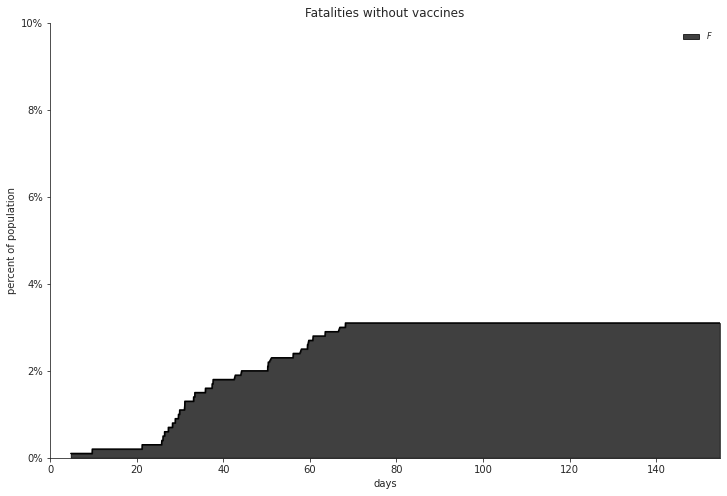

In [ ]:
ageGroup_pctHospitalized = {
                            '0-9':      0.0000,
                            '10-19':    0.0004,
                            '20-29':    0.0104,
                            '30-39':    0.0343,
                            '40-49':    0.0425,
                            '50-59':    0.0816,
                            '60-69':    0.218,
                            '70-79':    0.466,
                            '80+':      0.684 
                            }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in ageGroups]

ageGroup_hospitalFatalityRate = {
                                 '0-9':     0.0000,
                                 '10-19':   0.3627,
                                 '20-29':   0.0577,
                                 '30-39':   0.3426,
                                 '40-49':   0.3694,
                                 '50-59':   0.3532,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.7283 
                                 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in ageGroups]

BETA = .3
model = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED, mu_0 = 5.20)

model.run(300)
results_summary(model)
fig, ax = model.figure_basic(plot_F='stacked', plot_I_asym=False, plot_I_pre=False, 
                             plot_R=False, plot_H=False, plot_E=False, 
                             plot_I_sym=False, plot_S=False, ylim=.1, 
                             title="Fatalities without vaccines")
noVaccModel = model

###**Simulation 1: Prioritizing Age Group Under 20**
We run the simulation with the hospitilization and resulting fatality rates for the under 20 age group significantly reduced. Nodes in this age group will now be considered vaccinated for this model.

t = 0.09
t = 10.00
t = 20.06
t = 30.32
t = 40.03
t = 50.40
t = 60.10
t = 70.08
t = 80.02
t = 90.25
total percent infected: 24.40%
total percent fatality: 0.90%
peak  pct hospitalized: 0.60%


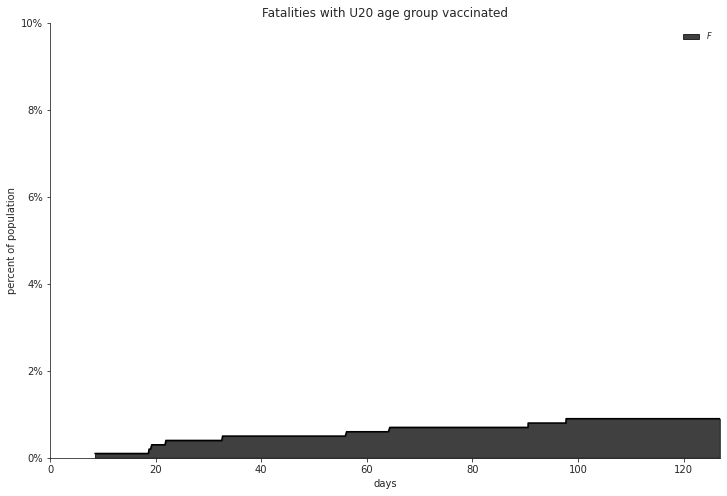

In [ ]:
ageGroup_pctHospitalized = {
                            '0-9':      0.0000,
                            '10-19':    0.0000,
                            '20-29':    0.0104,
                            '30-39':    0.0343,
                            '40-49':    0.1425,
                            '50-59':    0.1816,
                            '60-69':    0.218,
                            '70-79':    0.366,
                            '80+':      0.400 
                            }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in ageGroups]

ageGroup_hospitalFatalityRate = {
                                 '0-9':     0.0000,
                                 '10-19':   0.0000,
                                 '20-29':   0.0577,
                                 '30-39':   0.3426,
                                 '40-49':   0.3694,
                                 '50-59':   0.3532,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.7283 
                                 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in ageGroups]

BETA = .2
model1 = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED)

# for node in nodesU20:
#   model1.X[node] = 7
#   model1.set_isolation(model1.X[node], True)

model1.run(300)
results_summary(model1)
fig, ax = model1.figure_basic(plot_F='stacked', plot_I_asym=False, plot_I_pre=False, 
                             plot_R=False, plot_H=False, plot_E=False, 
                             plot_I_sym=False, plot_S=False, ylim=.1, 
                             title="Fatalities with U20 age group vaccinated")
under20Model = model1

###**Simulation 2: Prioritizing Age Group 20-39**
We run the simulation with the hospitilization and resulting fatality rates for the 20-39 age group significantly reduced. Nodes in this age group will now be considered vaccinated for this model.


t = 0.02
t = 10.10
t = 20.08
t = 30.01
t = 40.02
t = 50.12
t = 60.22
t = 70.07
t = 80.12
t = 90.29
total percent infected: 29.50%
total percent fatality: 2.40%
peak  pct hospitalized: 0.70%


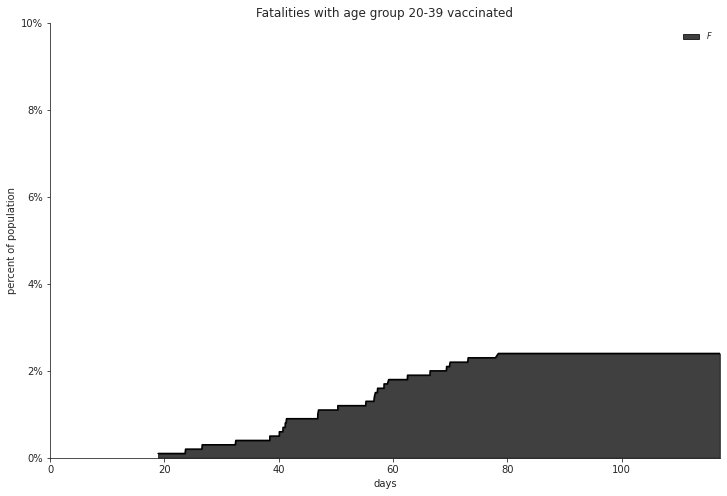

In [ ]:
ageGroup_pctHospitalized = {
                            '0-9':      0.0000,
                            '10-19':    0.0004,
                            '20-29':    0.0000,
                            '30-39':    0.0000,
                            '40-49':    0.0425,
                            '50-59':    0.0816,
                            '60-69':    0.218,
                            '70-79':    0.366,
                            '80+':      0.484 
                            }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in ageGroups]

ageGroup_hospitalFatalityRate = {
                                 '0-9':     0.0000,
                                 '10-19':   0.3627,
                                 '20-29':   0.0000,
                                 '30-39':   0.0000,
                                 '40-49':   0.3694,
                                 '50-59':   0.3532,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.7283 
                                 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in ageGroups]

BETA = .2
model2 = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED)

model2.run(300)
results_summary(model2)
fig, ax = model2.figure_basic(plot_F='stacked', plot_I_asym=False, plot_I_pre=False, 
                             plot_R=False, plot_H=False, plot_E=False, 
                             plot_I_sym=False, plot_S=False, ylim=.1, 
                             title="Fatalities with age group 20-39 vaccinated")
to39Model = model2

###**Simulation 3: Prioritizing Age Group 40-59**
We run the simulation with the hospitilization and resulting fatality rates for the 40-59 age group significantly reduced. Nodes in this age group will now be considered vaccinated for this model.

t = 0.01
t = 10.00
t = 20.03
t = 30.22
t = 40.28
t = 50.17
t = 60.18
t = 70.12
t = 90.32
total percent infected: 30.70%
total percent fatality: 1.40%
peak  pct hospitalized: 1.20%


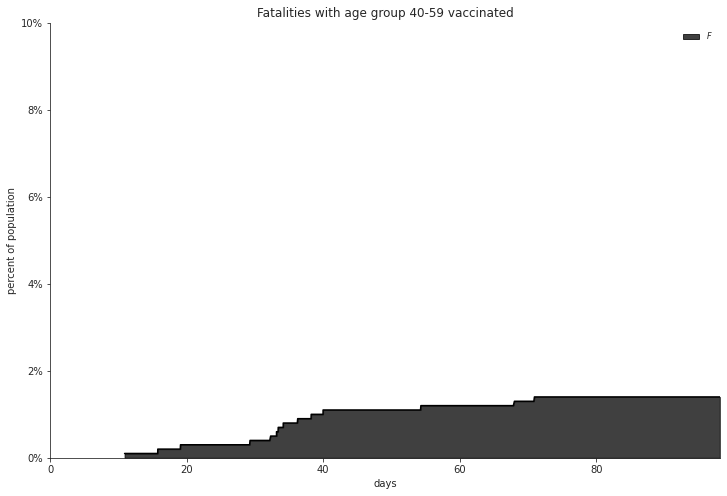

In [ ]:
ageGroup_pctHospitalized = {
                            '0-9':      0.0000,
                            '10-19':    0.0004,
                            '20-29':    0.0104,
                            '30-39':    0.0343,
                            '40-49':    0.0000,
                            '50-59':    0.0000,
                            '60-69':    0.318,
                            '70-79':    0.366,
                            '80+':      0.400 
                            }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in ageGroups]

ageGroup_hospitalFatalityRate = {
                                 '0-9':     0.0000,
                                 '10-19':   0.3627,
                                 '20-29':   0.0577,
                                 '30-39':   0.3426,
                                 '40-49':   0.0000,
                                 '50-59':   0.0000,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.7283 
                                 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in ageGroups]

BETA = .2
model3 = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED)

model3.run(300)
results_summary(model3)
fig, ax = model3.figure_basic(plot_F='stacked', plot_I_asym=False, plot_I_pre=False, 
                             plot_R=False, plot_H=False, plot_E=False, 
                             plot_I_sym=False, plot_S=False, ylim=.1, 
                             title="Fatalities with age group 40-59 vaccinated")
to59Model = model3

###**Simulation 4: Prioritizing Age Group 60-79**
We run the simulation with the hospitilization and resulting fatality rates for the 60-79 age group significantly reduced. Nodes in this age group will now be considered vaccinated for this model.

t = 0.05
t = 10.02
t = 20.01
t = 30.00
t = 40.17
t = 50.07
t = 60.01
t = 70.11
t = 80.81
t = 100.42
t = 110.35
t = 140.05
t = 150.14
t = 160.27
t = 180.20
t = 190.81
t = 200.41
t = 210.84
t = 220.34
total percent infected: 30.90%
total percent fatality: 0.90%
peak  pct hospitalized: 0.50%


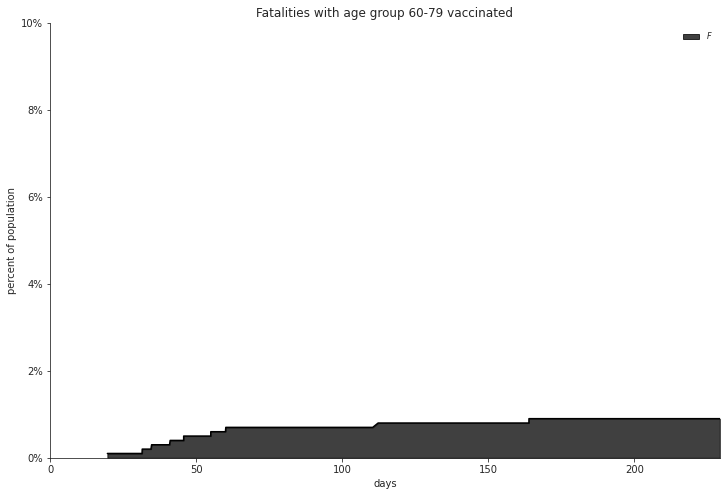

In [ ]:
ageGroup_pctHospitalized = {
                            '0-9':      0.0004,
                            '10-19':    0.0030,
                            '20-29':    0.0104,
                            '30-39':    0.1343,
                            '40-49':    0.1425,
                            '50-59':    0.1816,
                            '60-69':    0.0000,
                            '70-79':    0.0000,
                            '80+':      0.384 
                            }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in ageGroups]

ageGroup_hospitalFatalityRate = {'0-9':     0.0004,
                                 '10-19':   0.3627,
                                 '20-29':   0.3577,
                                 '30-39':   0.3426,
                                 '40-49':   0.3694,
                                 '50-59':   0.3532,
                                 '60-69':   0.0000,
                                 '70-79':   0.0000,
                                 '80+':     0.7283 
                                 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in ageGroups]

BETA = .2
model4 = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED)

model4.run(300)
results_summary(model4)
fig, ax = model4.figure_basic(plot_F='stacked', plot_I_asym=False, plot_I_pre=False, 
                             plot_R=False, plot_H=False, plot_E=False, 
                             plot_I_sym=False, plot_S=False, ylim=.1, 
                             title="Fatalities with age group 60-79 vaccinated")

to79Model = model4

###**Simulation 5: Prioritizing Age Group 80+**
We run the simulation with the hospitilization and resulting fatality rates for the 80+ age group significantly reduced. Nodes in this age group will now be considered vaccinated for this model.

t = 0.01
t = 10.01
t = 20.00
t = 30.09
t = 40.02
t = 50.26
t = 60.40
t = 70.04
t = 80.20
t = 90.52
t = 100.27
t = 110.04
t = 120.63
t = 130.59
t = 150.54
total percent infected: 32.60%
total percent fatality: 1.30%
peak  pct hospitalized: 0.60%


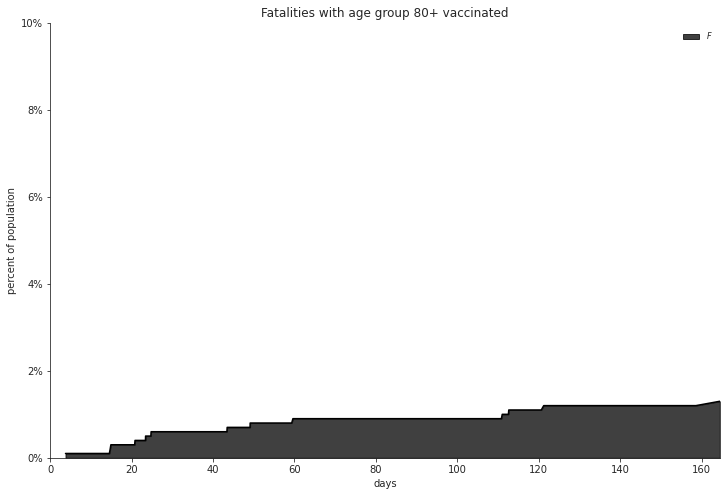

In [ ]:
ageGroup_pctHospitalized = {
                            '0-9':      0.0004,
                            '10-19':    0.0030,
                            '20-29':    0.0104,
                            '30-39':    0.0343,
                            '40-49':    0.1425,
                            '50-59':    0.1816,
                            '60-69':    0.318,
                            '70-79':    0.366,
                            '80+':      0.0000 
                            }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in ageGroups]

ageGroup_hospitalFatalityRate = {'0-9':     0.0004,
                                 '10-19':   0.3627,
                                 '20-29':   0.3577,
                                 '30-39':   0.3426,
                                 '40-49':   0.3694,
                                 '50-59':   0.3532,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.0000 
                                 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in ageGroups]

BETA = .2
model5 = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED)

model5.run(300)
results_summary(model5)
fig, ax = model5.figure_basic(plot_F='stacked', plot_I_asym=False, plot_I_pre=False, 
                             plot_R=False, plot_H=False, plot_E=False, 
                             plot_I_sym=False, plot_S=False, ylim=.1, 
                             title="Fatalities with age group 80+ vaccinated")
over80Model = model5

# Evaluation of Results

Plot that combines the results of prioritizing a single age group in each scenario, side-by-side with the baseline simulating just the COVID-19 spread with no vaccination distribution:

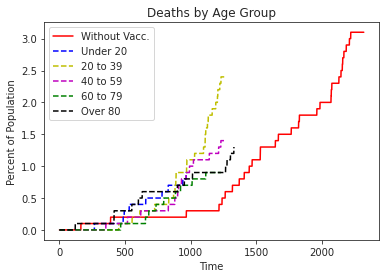

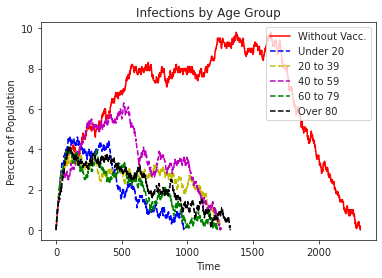

In [ ]:
import matplotlib.pyplot as plt


totalinfNO = noVaccModel.numI_asym + noVaccModel.numI_pre + noVaccModel.numI_sym
totalinf20 = under20Model.numI_asym + under20Model.numI_pre + under20Model.numI_sym
totalinf39 = to39Model.numI_asym + to39Model.numI_pre + to39Model.numI_sym
totalinf59 = to59Model.numI_asym + to59Model.numI_pre + to59Model.numI_sym
totalinf79 = to79Model.numI_asym + to79Model.numI_pre + to79Model.numI_sym
totalinf80 = over80Model.numI_asym + over80Model.numI_pre + over80Model.numI_sym


plt.plot(noVaccModel.numF/10,'r',label='Without Vacc.')
plt.plot(under20Model.numF/10,'b--',label='Under 20')
plt.plot(to39Model.numF/10,'y--',label='20 to 39')
plt.plot(to59Model.numF/10,'m--',label='40 to 59')
plt.plot(to79Model.numF/10,'g--',label='60 to 79')
plt.plot(over80Model.numF/10,'k--',label='Over 80')
plt.xlabel('Time')
plt.ylabel('Percent of Population')
plt.legend()
plt.title("Deaths by Age Group")
plt.show()


plt.plot(totalinfNO/10,'r',label='Without Vacc.')
plt.plot(totalinf20/10,'b--',label='Under 20')
plt.plot(totalinf39/10,'y--',label='20 to 39')
plt.plot(totalinf59/10,'m--',label='40 to 59')
plt.plot(totalinf79/10,'g--',label='60 to 79')
plt.plot(totalinf80/10,'k--',label='Over 80')
plt.xlabel('Time')
plt.ylabel('Percent of Population')
plt.legend()
plt.title("Infections by Age Group")
plt.show()

The above graphs show the following:


1.   The maximum amount of deaths and infections achieved throughout the simulations was by the no-vaccination COVID-19 spread model. This is accurate because the introduction of vaccine distribution decreases the infection and spread of the virus, in turn decreasing the total deaths.
2.   Prioritizing each of the age groups in the population for the vaccine consistently produced lower cumulative deaths and daily infections, which indicates that the vaccine is working.
3.   The simulations with vaccine distributions produced much faster and better results in decreasing the deaths and infections. This can be seen by the vaccine distribution models completing at earlier time stamps than the no-vaccination COVID-19 spread model.

Plot of the **Reductions in Deaths by Age Group** (cumulative deaths) and **Reductions in Infections by Age Group** (daily infections) by prioritizing a single age group for the vaccine in each scenario. To calculate the reductions in both deaths and infections, we used the results from the simulation of the COVID-19 spread without vaccine distribution, and took the difference between the baseline and the results gathered from prioritizing each of the age groups:

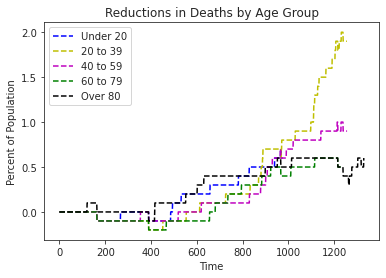

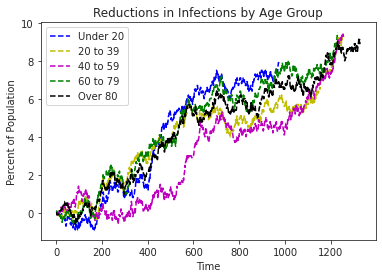

In [ ]:
plt.plot([(b_i - a_i)/10 for a_i, b_i in zip(noVaccModel.numF, under20Model.numF)],'b--',label='Under 20')
plt.plot([(b_i - a_i)/10 for a_i, b_i in zip(noVaccModel.numF, to39Model.numF)],'y--',label='20 to 39')
plt.plot([(b_i - a_i)/10 for a_i, b_i in zip(noVaccModel.numF, to59Model.numF)],'m--',label='40 to 59')
plt.plot([(b_i - a_i)/10 for a_i, b_i in zip(noVaccModel.numF, to79Model.numF)],'g--',label='60 to 79')
plt.plot([(b_i - a_i)/10 for a_i, b_i in zip(noVaccModel.numF, over80Model.numF)],'k--',label='Over 80')
plt.xlabel('Time')
plt.ylabel('Percent of Population')
plt.legend()
plt.title("Reductions in Deaths by Age Group")
plt.show()


plt.plot([(a_i - b_i)/10 for a_i, b_i in zip(totalinfNO, totalinf20)],'b--',label='Under 20')
plt.plot([(a_i - b_i)/10 for a_i, b_i in zip(totalinfNO, totalinf39)],'y--',label='20 to 39')
plt.plot([(a_i - b_i)/10 for a_i, b_i in zip(totalinfNO, totalinf59)],'m--',label='40 to 59')
plt.plot([(a_i - b_i)/10 for a_i, b_i in zip(totalinfNO, totalinf79)],'g--',label='60 to 79')
plt.plot([(a_i - b_i)/10 for a_i, b_i in zip(totalinfNO, totalinf80)],'k--',label='Over 80')
plt.xlabel('Time')
plt.ylabel('Percent of Population')
plt.legend()
plt.title("Reductions in Infections by Age Group")
plt.show()

This is the artifact of our vaccine prioritization simulation using the SEIR model. The graphs show reductions in deaths and infections by prioritized age group. The higher the graph line, the higher the reduction, the better the effect.

**Reductions in Deaths**:
<br>
Highest Reduction: Prioritizing the 20-39 age group
<br>
Lowest Reduction: Prioritizing the Over 80 age group

**Reductions in Infections**:
<br>
Highest Reduction: Prioritizing the Under 20 age group
<br>
Lowest Reduction: Prioritizing the Over 80 age group

Using the SEIR model was powerful in providing the tools to be able to simulate the effect of vaccinations against the baseline. Although prioritizing each age group produces far better results than the baseline, some age groups perform better than others. From the results, we can see that prioritizing the *Over 80* age group is the least advantageous since it provides the lowest reduction and deaths over the simulation period. Our goal is to make a decision on which age group to prioritize in order to reduce deaths and infections, and the simulations using the SEIR model show that prioritizing the *20-39* age group produces the largest reduction in deaths, while prioritizing the *Under 20* age group produces the largest reduction in infections. To maximize the benefits, the vaccine prioritization should be towards one of those two age groups.